# 01. Data

In [ ]:
!pip install yfinance

In [2]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set()
pd.options.display.float_format = '{:.4f}'.format 

In [3]:
n_years = 5

## 01.01. Close Values

In [4]:
def get_close_values(symbols, years):
  end = datetime.now()
  start = end - timedelta(days = 365 * years)
  data = yf.download(symbols,start,end)
  return data.Close.dropna().copy()

In [5]:
symbols = ['VWO','PDBC','SPY','VTWO','ESGU','QQQ','VTI','SCHD','VCLT']
close = get_close_values(symbols,5)
close.describe()

[*********************100%***********************]  9 of 9 completed


,ESGU,PDBC,QQQ,SCHD,SPY,VCLT,VTI,VTWO,VWO
count,1259.0000,1259.0000,1259.0000,1259.0000,1259.0000,1259.0000,1259.0000,1259.0000,1259.0000
mean,69.8670,16.6240,221.0467,56.0910,312.3872,97.5074,160.4950,66.7411,44.2792
std,16.2521,2.1818,79.2169,10.4691,66.5366,8.0264,34.8316,12.8346,5.0038
min,49.5600,11.2200,122.3300,39.5000,222.9500,78.7000,111.9100,40.0300,30.4600
25%,58.2850,15.5800,162.6400,49.1050,265.6500,90.2200,136.4900,58.8350,40.7000
50%,63.7600,16.5800,186.5000,52.6000,289.1200,95.9600,147.9500,62.3550,43.3200
75%,78.1700,17.8200,283.6050,58.4900,342.8250,105.3100,174.6950,68.3225,47.8300
max,108.4600,22.7100,403.9900,81.7900,477.7100,112.9600,242.9700,98.0100,56.4900


In [6]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-01-09 to 2022-01-06
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ESGU    1259 non-null   float64
 1   PDBC    1259 non-null   float64
 2   QQQ     1259 non-null   float64
 3   SCHD    1259 non-null   float64
 4   SPY     1259 non-null   float64
 5   VCLT    1259 non-null   float64
 6   VTI     1259 non-null   float64
 7   VTWO    1259 non-null   float64
 8   VWO     1259 non-null   float64
dtypes: float64(9)
memory usage: 98.4 KB


## 01.02. Return Values

In [7]:
def get_return_values(close):
  returns = close.pct_change()
  return returns
  

In [8]:
returns = get_return_values(close)
returns.describe()

,ESGU,PDBC,QQQ,SCHD,SPY,VCLT,VTI,VTWO,VWO
count,1258.0000,1258.0000,1258.0000,1258.0000,1258.0000,1258.0000,1258.0000,1258.0000,1258.0000
mean,0.0007,-0.0000,0.0010,0.0006,0.0006,0.0001,0.0006,0.0005,0.0003
std,0.0122,0.0134,0.0141,0.0120,0.0119,0.0082,0.0121,0.0151,0.0130
min,-0.1200,-0.2656,-0.1198,-0.0995,-0.1094,-0.0882,-0.1138,-0.1347,-0.1209
25%,-0.0027,-0.0050,-0.0042,-0.0036,-0.0030,-0.0031,-0.0032,-0.0058,-0.0058
50%,0.0003,0.0011,0.0016,0.0011,0.0008,0.0003,0.0008,0.0011,0.0011
75%,0.0055,0.0062,0.0077,0.0053,0.0058,0.0035,0.0059,0.0075,0.0072
max,0.0969,0.0433,0.0847,0.0879,0.0906,0.0982,0.0949,0.0963,0.0700


In [9]:
returns.head()

,ESGU,PDBC,QQQ,SCHD,SPY,VCLT,VTI,VTWO,VWO
Date,,,,,,,,,
2017-01-09,nan,nan,nan,nan,nan,nan,nan,nan,nan
2017-01-10,0.0016,-0.0053,0.0022,-0.0034,0.0000,0.0006,0.0008,0.0103,0.0055
2017-01-11,0.0000,0.0136,0.0027,0.0028,0.0028,0.0002,0.0032,0.0016,0.0087
2017-01-12,0.0000,0.0134,-0.0015,-0.0021,-0.0025,-0.0015,-0.0026,-0.0082,0.0024
2017-01-13,0.0000,-0.0012,0.0034,0.0007,0.0023,-0.0012,0.0025,0.0080,-0.0011


## 01.03. Log Return Values

In [10]:
def get_log_returns(close):
  log_returns = np.log(close/close.shift())
  return log_returns

In [11]:
log_returns = get_log_returns(close)
log_returns.describe()

,ESGU,PDBC,QQQ,SCHD,SPY,VCLT,VTI,VTWO,VWO
count,1258.0000,1258.0000,1258.0000,1258.0000,1258.0000,1258.0000,1258.0000,1258.0000,1258.0000
mean,0.0006,-0.0001,0.0009,0.0005,0.0006,0.0001,0.0006,0.0004,0.0002
std,0.0122,0.0142,0.0142,0.0120,0.0120,0.0082,0.0122,0.0152,0.0131
min,-0.1279,-0.3088,-0.1276,-0.1048,-0.1159,-0.0924,-0.1208,-0.1447,-0.1288
25%,-0.0027,-0.0050,-0.0042,-0.0036,-0.0030,-0.0031,-0.0032,-0.0058,-0.0058
50%,0.0003,0.0011,0.0016,0.0011,0.0008,0.0003,0.0008,0.0011,0.0011
75%,0.0055,0.0062,0.0077,0.0053,0.0058,0.0035,0.0059,0.0075,0.0072
max,0.0925,0.0424,0.0813,0.0843,0.0867,0.0937,0.0907,0.0919,0.0677


In [12]:
log_returns.head()

,ESGU,PDBC,QQQ,SCHD,SPY,VCLT,VTI,VTWO,VWO
Date,,,,,,,,,
2017-01-09,nan,nan,nan,nan,nan,nan,nan,nan,nan
2017-01-10,0.0016,-0.0053,0.0022,-0.0034,0.0000,0.0006,0.0008,0.0102,0.0054
2017-01-11,0.0000,0.0135,0.0027,0.0028,0.0028,0.0002,0.0032,0.0016,0.0086
2017-01-12,0.0000,0.0133,-0.0015,-0.0021,-0.0025,-0.0015,-0.0026,-0.0083,0.0024
2017-01-13,0.0000,-0.0012,0.0034,0.0007,0.0023,-0.0012,0.0025,0.0080,-0.0011


In [13]:
log_returns.describe()

,ESGU,PDBC,QQQ,SCHD,SPY,VCLT,VTI,VTWO,VWO
count,1258.0000,1258.0000,1258.0000,1258.0000,1258.0000,1258.0000,1258.0000,1258.0000,1258.0000
mean,0.0006,-0.0001,0.0009,0.0005,0.0006,0.0001,0.0006,0.0004,0.0002
std,0.0122,0.0142,0.0142,0.0120,0.0120,0.0082,0.0122,0.0152,0.0131
min,-0.1279,-0.3088,-0.1276,-0.1048,-0.1159,-0.0924,-0.1208,-0.1447,-0.1288
25%,-0.0027,-0.0050,-0.0042,-0.0036,-0.0030,-0.0031,-0.0032,-0.0058,-0.0058
50%,0.0003,0.0011,0.0016,0.0011,0.0008,0.0003,0.0008,0.0011,0.0011
75%,0.0055,0.0062,0.0077,0.0053,0.0058,0.0035,0.0059,0.0075,0.0072
max,0.0925,0.0424,0.0813,0.0843,0.0867,0.0937,0.0907,0.0919,0.0677


## 01.04. Mean Variance Analysis

It assumes that financial returns follow a Normal Distribution *(not typically true)*. STD of returns undersestimates the true/full risk of an investment as it fails to measure "Tail Risks"

In [16]:
summary = log_returns.agg(['mean','std']).T
summary.columns = ['Mean','Std']
summary

,Mean,Std
ESGU,0.0006,0.0122
PDBC,-0.0001,0.0142
QQQ,0.0009,0.0142
SCHD,0.0005,0.0120
SPY,0.0006,0.0120
VCLT,0.0001,0.0082
VTI,0.0006,0.0122
VTWO,0.0004,0.0152
VWO,0.0002,0.0131


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


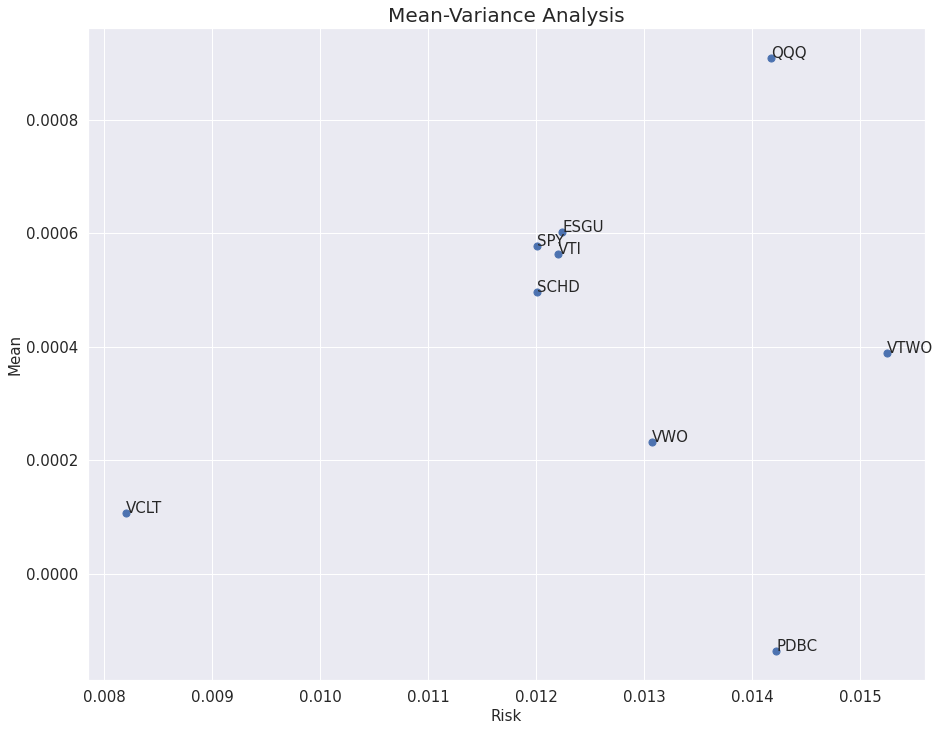

In [19]:
summary.plot(kind = 'scatter',x = "Std",y = "Mean",figsize = (15,12),s = 50,fontsize = 15)
for i in summary.index:
  plt.annotate(i,xy = (summary.loc[i,"Std"] + 0.0000005,summary.loc[i,"Mean"] + 0.0000005),size = 15)
plt.xlabel("Risk",fontsize = 15)
plt.ylabel("Mean",fontsize = 15)
plt.title("Mean-Variance Analysis",fontsize = 20)
plt.show()